In [4]:
import pandas as pd
import requests
from pathlib import Path
import tarfile

In [13]:
# downloads https://static.crates.io/db-dump.tar.gz
# and extracts the files "crates.csv" and "crate_downloads.csv" from the archive to ./db-dump

def tar_extract_to_path(tarfile: tarfile.TarFile, member_name: str, output_path: str):
    member = tarfile.getmember(member_name)
    with tarfile.extractfile(member) as f:
        with open(output_path, "wb+") as out:
            out.write(f.read())
    

archive_url = "https://static.crates.io/db-dump.tar.gz"
archive_path = "./db-dump.tar.gz"
extract_dir = "./db-dump"
crates_csv = f"{extract_dir}/crates.csv"
crate_downloads_csv = f"{extract_dir}/crate_downloads.csv"
did_download = False
if not Path(archive_path).exists():
    response = requests.get(archive_url)
    with open(archive_path, "wb+") as f:
        f.write(response.content)
    did_download = True
# download the archive
if did_download or (not Path(crates_csv).exists() or not Path(crate_downloads_csv).exists()):

    
    # extract the archive
    if not Path(extract_dir).exists():
        Path(extract_dir).mkdir()
    with tarfile.open(archive_path, "r:gz") as tar:
        tar_crates_path = [m for m in tar.getnames() if "crates.csv" in m][0]    
        tar_crate_downloads_path = [m for m in tar.getnames() if "crate_downloads.csv" in m][0]
        tar_extract_to_path(tar, tar_crates_path, crates_csv)
        tar_extract_to_path(tar, tar_crate_downloads_path, crate_downloads_csv)


In [14]:
crates = pd.read_csv(crates_csv)
downloads = pd.read_csv(crate_downloads_csv)



In [3]:
joined = crates.merge(downloads, left_on='id',right_on='crate_id')

In [10]:
joined[(joined.downloads > 1e7) & (joined.downloads < 1e8)].sample(10)

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at,crate_id,downloads
30564,2019-09-06 16:14:56.535961+00,Fixed size boolean arrays,http://docs.rs/bitmaps,NaN,162820,NaN,NaN,bitmaps,# bitmaps\n\nA fixed size compact boolean arra...,https://github.com/bodil/bitmaps,2024-02-01 19:11:58.66657+00,162820,21748130
165849,2023-04-10 04:20:07.093409+00,A variant of sval::Value for types with intern...,https://docs.rs/sval_ref,NaN,834806,NaN,NaN,sval_ref,# `sval_ref`\n\n[![Rust](https://github.com/sv...,https://github.com/sval-rs/sval,2025-01-14 11:08:14.619482+00,834806,10640629
169933,2015-09-08 00:53:20.231605+00,A crate to wait on a child process with a time...,https://docs.rs/wait-timeout,https://github.com/alexcrichton/wait-timeout,3000,NaN,NaN,wait-timeout,# wait-timeout\n\n[![Build Status](https://git...,https://github.com/alexcrichton/wait-timeout,2025-02-03 12:22:33.904538+00,3000,52432685
152645,2015-02-12 10:50:45.59383+00,Bindings to Core Foundation for macOS,NaN,https://github.com/servo/core-foundation-rs,1386,NaN,NaN,core-foundation,NaN,https://github.com/servo/core-foundation-rs,2024-08-11 05:37:53.580329+00,1386,92034442
139792,2015-11-29 17:53:47.748928+00,"A safe, extensible ORM and Query Builder for P...",https://docs.rs/diesel/,https://diesel.rs,3531,NaN,NaN,diesel,[![diesel logo](https://diesel.rs/assets/image...,https://github.com/diesel-rs/diesel,2025-03-03 17:45:52.588398+00,3531,14115947
140144,2022-07-20 17:56:38.899689+00,Checksum calculation and verification callbacks,NaN,NaN,629004,NaN,NaN,aws-smithy-checksums,# aws-smithy-checksums\n\nChecksum calculation...,https://github.com/smithy-lang/smithy-rs,2025-02-20 18:13:18.873937+00,629004,19092383
168842,2018-07-13 16:29:07.20205+00,Cranelift IR builder helper,https://docs.rs/cranelift-frontend,NaN,74045,NaN,NaN,cranelift-frontend,This crate provides a straightforward way to c...,https://github.com/bytecodealliance/wasmtime,2025-02-25 18:27:06.431097+00,74045,16996288
12446,2020-10-15 15:31:04.542638+00,Trait and struct definitions for the ICU data ...,NaN,https://icu4x.unicode.org,300037,NaN,NaN,icu_provider,# icu_provider [![crates.io](https://img.shiel...,https://github.com/unicode-org/icu4x,2025-02-26 18:36:20.847603+00,300037,28116999
63744,2020-05-15 20:47:14.005767+00,Compact inlined strings,http://docs.rs/smartstring,NaN,242167,NaN,NaN,smartstring,# smartstring\n\nCompact inlined strings.\n\n#...,https://github.com/bodil/smartstring,2022-03-24 18:30:52.44179+00,242167,18831089
165875,2023-03-24 05:21:50.885272+00,Value buffering for sval,https://docs.rs/sval_buffer,NaN,819062,NaN,NaN,sval_buffer,# `sval_buffer`\n\n[![Rust](https://github.com...,https://github.com/sval-rs/sval,2025-01-14 11:08:36.348154+00,819062,10666024


In [12]:
print("Max", joined.downloads.max())
print("Min", joined.downloads.min())
print("Median", joined.downloads.median())
print("Average", joined.downloads.mean())
print("Std", joined.downloads.std())


Max 771390774
Min 0
Median 3328.0
Average 666594.8213674179
Std 10465904.32921471


In [ ]:
# Get at most 10 crates with downloads within 1000 of the median
median = joined.downloads.median()
(joined[(joined.downloads > median - 1000) & (joined.downloads < median + 1000)].sample(10))

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at,crate_id,downloads
164628,2023-05-22 05:28:05.235112+00,Rust Asn1 format code generation\n,NaN,NaN,870371,NaN,NaN,asn1obj_codegen,# asn1obj\r\n> rust parse ASN.1 format code ge...,https://github.com/jeppeter/asn1obj,2025-02-08 04:09:28.637756+00,870371,2789
7173,2024-01-15 13:59:18.64257+00,"A Rust implementation of the cybertoken, a tok...",NaN,NaN,1100350,NaN,NaN,cybertoken,# cybertoken-rs [![CI](https://github.com/luca...,https://github.com/lucagoslar/cybertoken-rs,2024-01-15 14:03:46.48455+00,1100350,2950
124062,2022-04-04 07:49:11.869782+00,MultiSQL CLI,NaN,NaN,561876,NaN,NaN,multisql-cli,# multisql-cli\r\nCLI for MultiSQL\r\n,https://github.com/KyGost/multisql-cli,2022-04-12 06:04:16.938615+00,561876,3627
85984,2021-09-08 21:16:48.288398+00,Rust wrapper for metasploit,https://docs.rs/rust-metasploit/1.2.0/metasploit/,https://docs.rs/rust-metasploit/1.2.0/metasploit/,448630,NaN,NaN,rust-metasploit,# rs-metasploit\n[![Metasploit Rust](https://g...,https://github.com/parrothacker1/rust-metasploit,2023-05-18 06:03:56.630723+00,448630,3694
28613,2019-04-21 11:17:08.991335+00,Basic compile-time byteorder for various envir...,NaN,https://github.com/sysfunc/sysfunc-byteorder.rs/,129238,NaN,NaN,sysfunc-byteorder,# `sysfunc-byteorder`\r\n\r\nThis repository c...,https://github.com/sysfunc/sysfunc-byteorder.rs/,2019-04-22 11:18:36.136737+00,129238,3198
128228,2022-05-26 21:37:45.809343+00,description,NaN,NaN,594488,NaN,NaN,windows-sys-gaming,NaN,NaN,2022-11-03 17:54:14.362922+00,594488,3369
67278,2018-09-14 02:07:41.419088+00,PHC string encoding/decoding library.,NaN,NaN,84619,NaN,NaN,phc,NaN,https://github.com/kstrohbeck/phc,2019-12-10 18:38:27.451927+00,84619,3844
141076,2024-11-24 04:21:34.641751+00,"A Rust library for tracing EVM transactions, i...",https://docs.rs/revm-trace,NaN,1458958,NaN,NaN,revm-trace,# REVM Transaction Simulator and Analyzer\n\nA...,https://github.com/Rollp0x/revm-trace,2025-03-02 06:53:36.026948+00,1458958,3204
68999,2022-09-23 03:30:17.441191+00,A collection of Rust asynchronous I/O utilities,https://docs.rs/async-ioutil,NaN,672095,NaN,NaN,async-ioutil,# async-ioutil\n\n[![GitHub Workflow Status](h...,https://github.com/candyc1oud/ioutils,2022-10-02 02:24:32.242062+00,672095,2904
6950,2021-07-27 03:07:49.873168+00,Turn any value into a nu-protocol::Value with ...,https://docs.rs/serde-nu,NaN,427758,NaN,NaN,serde-nu,# `serde-nu`\n\nConvert any value implementing...,https://github.com/lily-mara/serde-nu,2021-07-27 05:14:10.495127+00,427758,3273


In [23]:
# Get at most 10 crates within one standard deviation of the mean
mean = joined.downloads.mean()
std = joined.downloads.std()

joined[(joined.downloads > mean - std) & (joined.downloads < mean + std)].head(10)

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at,crate_id,downloads
0,2023-05-01 12:06:24.629411+00,Crate name reserved\n,NaN,NaN,853351,NaN,NaN,madara,"<p align=""center"">\n <h1 align=""center"">madar...",NaN,2023-05-01 12:06:24.629411+00,853351,1034
1,2023-05-24 06:42:04.039181+00,Rust structure mapped to Swagger,NaN,https://github.com/denganjia/openapi-schema,872703,NaN,NaN,openapi-schema,# OpenApi-Schema\n\nRust structure mapped to o...,https://github.com/denganjia/openapi-schema,2023-06-21 02:13:09.838873+00,872703,9228
2,2024-02-25 16:14:19.767307+00,Wappu is a fast and flexible web scraping libr...,NaN,NaN,1152587,NaN,NaN,wappu,# Wappu: A Rust Web Scraping Library\n\nWappu ...,NaN,2024-03-31 16:25:27.380231+00,1152587,6313
3,2024-03-13 10:12:48.064691+00,Provides assets management functionality for F...,NaN,https://konceptosociala.eu.org/flatbox,1171587,NaN,NaN,flatbox_assets,NaN,https://github.com/konceptosociala/flatbox,2024-03-13 10:12:48.064691+00,1171587,1482
4,2024-03-25 13:26:39.711734+00,Swap Bevy Worlds at runtime,NaN,NaN,1185299,NaN,NaN,bevy_worldswap,# Bevy World-Swap\n\nSwap an app's `World` at ...,https://github.com/UkoeHB/bevy_worldswap,2024-03-25 13:26:39.711734+00,1185299,1045
5,2024-04-14 16:41:03.430624+00,"Just an example repository, on how rust docs w...",NaN,NaN,1208368,NaN,NaN,comments_rust_docs,NaN,NaN,2024-04-14 16:41:03.430624+00,1208368,979
6,2024-03-13 12:56:00.940663+00,Unofficial Lua 5.4 unsafe bindings,NaN,NaN,1171666,NaN,NaN,lua54-sys,NaN,NaN,2024-03-13 13:00:51.309345+00,1171666,1904
7,2024-03-13 11:23:56.402703+00,An async implementation of a rqlite client,https://docs.rs/rqlite/,https://codeberg.org/zesty/rqlite-rs,1171622,NaN,NaN,rqlite-ha421,# rqlite-ha421\na temporary fork of rqlite-rs\...,https://codeberg.org/zesty/rqlite-rs,2024-03-13 15:55:37.648138+00,1171622,2733
8,2024-03-17 19:53:15.17254+00,Test,NaN,NaN,1176759,NaN,NaN,minigrepsada,NaN,NaN,2024-03-17 19:57:51.706603+00,1176759,2778
9,2024-09-04 20:30:39.530494+00,A library for testing,NaN,NaN,1363756,NaN,NaN,test_minigrip,NaN,NaN,2024-09-04 20:30:39.530494+00,1363756,590


In [3]:
crates

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at
0,2023-05-01 12:06:24.629411+00,Crate name reserved\n,NaN,NaN,853351,NaN,NaN,madara,"<p align=""center"">\n <h1 align=""center"">madar...",NaN,2023-05-01 12:06:24.629411+00
1,2023-05-24 06:42:04.039181+00,Rust structure mapped to Swagger,NaN,https://github.com/denganjia/openapi-schema,872703,NaN,NaN,openapi-schema,# OpenApi-Schema\n\nRust structure mapped to o...,https://github.com/denganjia/openapi-schema,2023-06-21 02:13:09.838873+00
2,2024-02-25 16:14:19.767307+00,Wappu is a fast and flexible web scraping libr...,NaN,NaN,1152587,NaN,NaN,wappu,# Wappu: A Rust Web Scraping Library\n\nWappu ...,NaN,2024-03-31 16:25:27.380231+00
3,2024-03-13 10:12:48.064691+00,Provides assets management functionality for F...,NaN,https://konceptosociala.eu.org/flatbox,1171587,NaN,NaN,flatbox_assets,NaN,https://github.com/konceptosociala/flatbox,2024-03-13 10:12:48.064691+00
4,2024-03-25 13:26:39.711734+00,Swap Bevy Worlds at runtime,NaN,NaN,1185299,NaN,NaN,bevy_worldswap,# Bevy World-Swap\n\nSwap an app's `World` at ...,https://github.com/UkoeHB/bevy_worldswap,2024-03-25 13:26:39.711734+00
...,...,...,...,...,...,...,...,...,...,...,...
173446,2025-03-07 01:52:24.858481+00,Azure Event Hubs is a highly scalable publish-...,https://docs.rs/azure_messaging_eventhubs_proc...,https://github.com/azure/azure-sdk-for-rust,1582154,NaN,NaN,azure_messaging_eventhubs_processor,# Microsoft Azure Key Vault management client ...,https://github.com/azure/azure-sdk-for-rust,2025-03-07 01:52:24.858481+00
173447,2024-08-08 00:20:26.452358+00,A command-line application for generating TV e...,NaN,https://github.com/bladepoint6969/tvdb-ep-list,1328920,NaN,NaN,tvdb-ep-list,# TVDB Episode Listings\n\n[![Latest Version]]...,https://github.com/bladepoint6969/tvdb-ep-list,2025-03-07 01:53:28.09479+00
173448,2025-03-07 01:56:43.601984+00,A simple CLI temperature converter,NaN,NaN,1582161,NaN,NaN,simpletempconv,simpletempconv v1.0.0 published by Prophet9441...,NaN,2025-03-07 01:56:43.601984+00
173449,2025-03-07 01:37:11.439459+00,A library to read Fujifilm Recipes & Exif Meta...,NaN,NaN,1582142,NaN,NaN,fuji,# Fuji\n\nRead Fujifilm Recipe Settings from E...,NaN,2025-03-07 01:47:56.718307+00


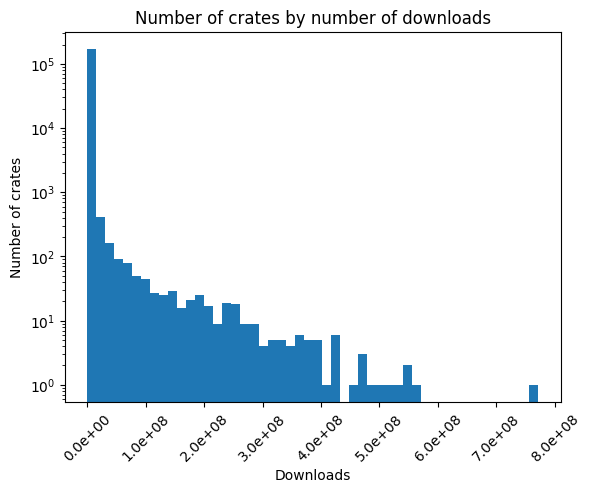

In [43]:
# Create a bar graph with the number of downloads on the x axis and the number of crates in a bin on the y axis. Use an appropriate number of bins.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.hist(joined.downloads[joined.downloads > 0], bins=50)
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
plt.xticks(rotation=45)
plt.xlabel('Downloads')
plt.ylabel('Number of crates')
plt.title('Number of crates by number of downloads')
plt.show()


In [30]:
joined.downloads[joined.downloads > 1000]

0           1034
1           9228
2           6313
3           1482
4           1045
           ...  
173437     77579
173438    517133
173441     18803
173443     16608
173447      8477
Name: downloads, Length: 152907, dtype: int64